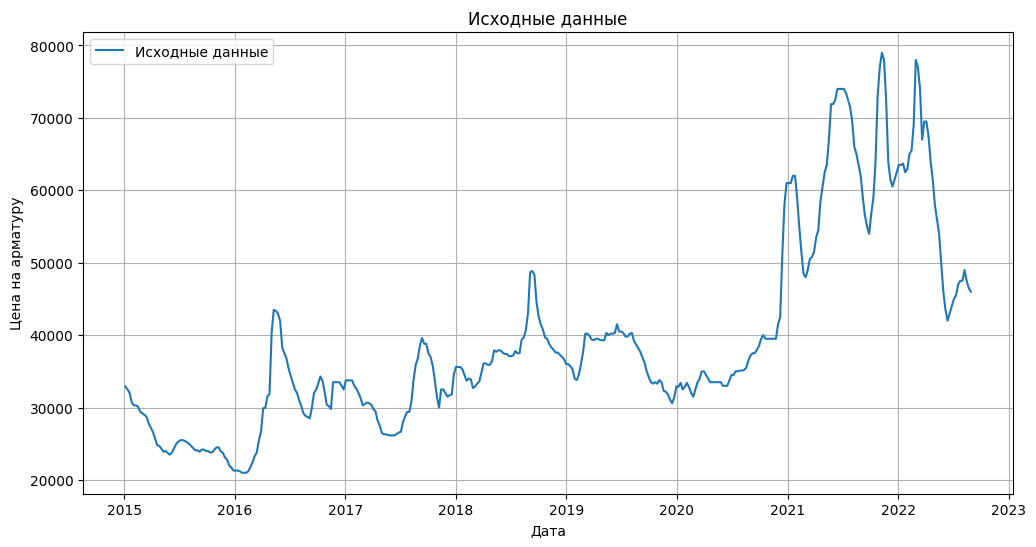

Количество пропусков до интерполяции: 0
Количество пропусков после интерполяции: 0


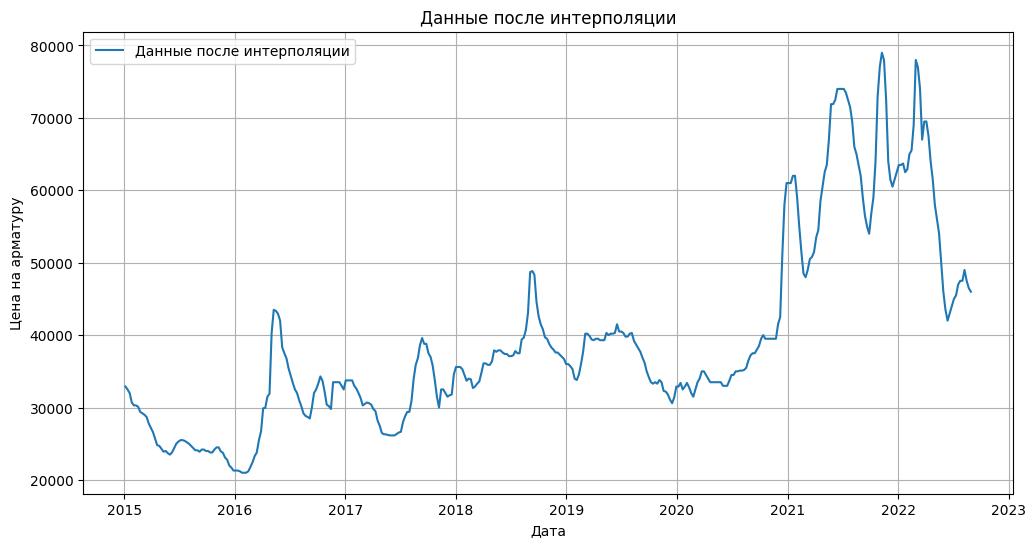

Размер DataFrame до удаления выбросов: 400
Размер DataFrame после удаления выбросов: 385


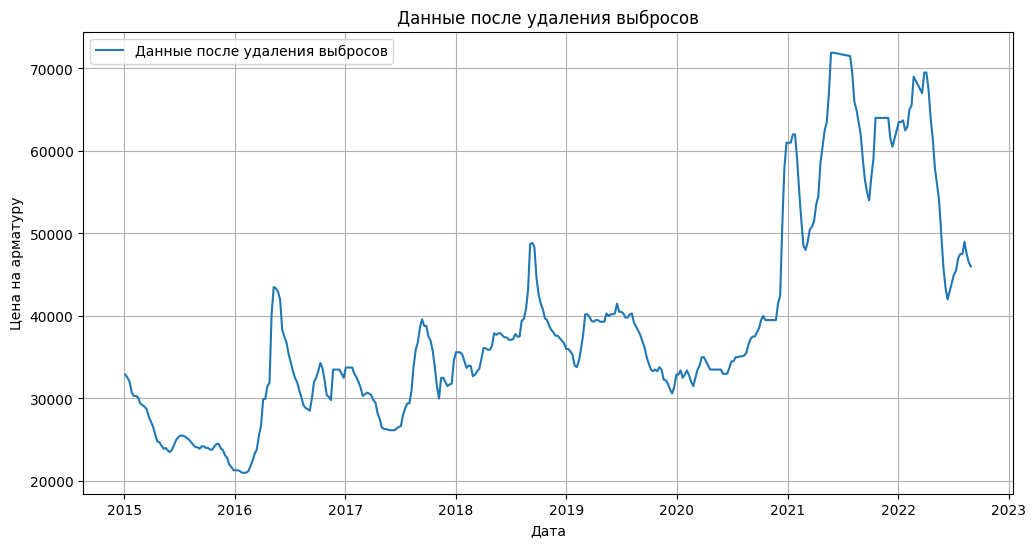

Размер DataFrame до удаления дубликатов: 385
Размер DataFrame после удаления дубликатов: 385
Данные сохранены в файл: C:\Users\Seredin Sergei\Desktop\Интенсив 3\train_2.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import medfilt

# 1. Загрузка данных
file_path = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train.csv"
df = pd.read_csv(file_path)

# 2. Преобразование типа данных столбца dt в datetime
df['dt'] = pd.to_datetime(df['dt'])

# График исходных данных
plt.figure(figsize=(12, 6))
plt.plot(df['dt'], df['Цена на арматуру'], label='Исходные данные')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.title('Исходные данные')
plt.legend()
plt.grid(True)
plt.show()

# 3. Замена пропусков интерполяцией
print(f"Количество пропусков до интерполяции: {df.isnull().sum().sum()}")
df.interpolate(inplace=True)
print(f"Количество пропусков после интерполяции: {df.isnull().sum().sum()}")

# График данных после интерполяции
plt.figure(figsize=(12, 6))
plt.plot(df['dt'], df['Цена на арматуру'], label='Данные после интерполяции')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.title('Данные после интерполяции')
plt.legend()
plt.grid(True)
plt.show()

# 4. Удаление выбросов (простой пример, требует адаптации)

# Рассчитываем межквартильный размах (IQR)
Q1 = df['Цена на арматуру'].quantile(0.25)
Q3 = df['Цена на арматуру'].quantile(0.8)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем выбросы
df_filtered = df[(df['Цена на арматуру'] >= lower_bound) & (df['Цена на арматуру'] <= upper_bound)]

print(f"Размер DataFrame до удаления выбросов: {len(df)}")
print(f"Размер DataFrame после удаления выбросов: {len(df_filtered)}")

# График данных после удаления выбросов
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['dt'], df_filtered['Цена на арматуру'], label='Данные после удаления выбросов')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.title('Данные после удаления выбросов')
plt.legend()
plt.grid(True)
plt.show()

df = df_filtered.copy() # Обновляем основной датасет

# 5. Удаление дубликатов
print(f"Размер DataFrame до удаления дубликатов: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Размер DataFrame после удаления дубликатов: {len(df)}")


# 6. Сохранение данных
output_file_path = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_2.csv"
df.to_csv(output_file_path, index=False)

print(f"Данные сохранены в файл: {output_file_path}")

Данные успешно сглажены и сохранены в файл: C:\Users\Seredin Sergei\Desktop\Интенсив 3\train_3.csv


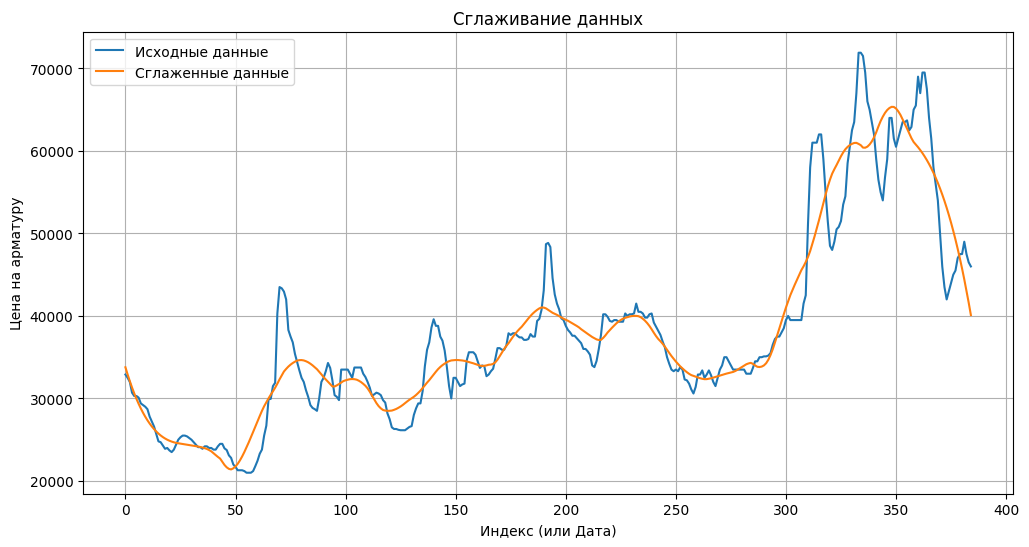

In [9]:
import pandas as pd
from scipy.signal import savgol_filter

# Пути к файлам
input_file = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_2.csv"
output_file = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_3.csv"

# Название столбца, который нужно сгладить
price_column = 'Цена на арматуру'

# Параметры фильтра Савицкого-Голея (настройте их под свои данные!)
window_length = 51
polyorder = 3

try:
    # Загрузка данных
    df = pd.read_csv(input_file)

    # Применение фильтра Савицкого-Голея
    df['Цена_гладкая'] = savgol_filter(df[price_column], window_length, polyorder)

    # Сохранение обработанных данных в новый файл
    df.to_csv(output_file, index=False)
    print(f"Данные успешно сглажены и сохранены в файл: {output_file}")

    # Визуализация (опционально)
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.plot(df[price_column], label='Исходные данные')
    plt.plot(df['Цена_гладкая'], label='Сглаженные данные')
    plt.xlabel('Индекс (или Дата)')
    plt.ylabel('Цена на арматуру')
    plt.title('Сглаживание данных')
    plt.legend()
    plt.grid(True)
    plt.show()


except FileNotFoundError:
    print(f"Ошибка: Файл {input_file} не найден.")
except ValueError as e:
    print(f"Ошибка: {e}")
except Exception as e:
    print(f"Общая ошибка: {e}")

Данные успешно сглажены и сохранены в файл: C:\Users\Seredin Sergei\Desktop\Интенсив 3\train_hz.csv


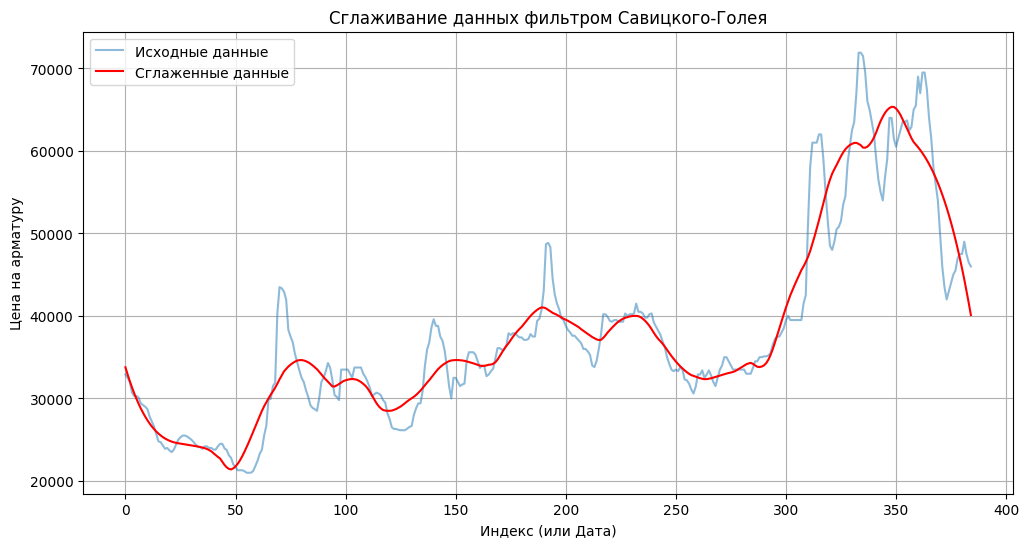

In [10]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Пути к файлам
input_file = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_2.csv"
output_file = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_hz.csv"

# Имя столбца с ценой
price_column = 'Цена на арматуру'

# Параметры фильтра Савицкого-Голея (важно настроить под свои данные)
window_length = 51
polyorder = 3

try:
    # Загрузка данных
    df = pd.read_csv(input_file)

    # 1. Сглаживание с помощью фильтра Савицкого-Голея
    # Корректировка window_length
    if window_length >= len(df):
        window_length = len(df) - 1
        if window_length % 2 == 0:
            window_length -= 1

    if window_length < 3:
        raise ValueError("Длина данных слишком мала для фильтрации. Увеличьте размер данных или уменьшите window_length.")


    df['Цена_гладкая'] = savgol_filter(df[price_column], window_length, polyorder)

    # 2. Сохранение обработанных данных в новый файл
    df.to_csv(output_file, index=False)
    print(f"Данные успешно сглажены и сохранены в файл: {output_file}")


    # 3. Визуализация результатов
    plt.figure(figsize=(12, 6))
    plt.plot(df[price_column], label='Исходные данные', alpha=0.5) # Исходные данные полупрозрачными
    plt.plot(df['Цена_гладкая'], label='Сглаженные данные', color='red') # Сглаженные данные красным
    plt.xlabel('Индекс (или Дата)')
    plt.ylabel('Цена на арматуру')
    plt.title('Сглаживание данных фильтром Савицкого-Голея')
    plt.legend()
    plt.grid(True)
    plt.show()


except FileNotFoundError:
    print(f"Ошибка: Файл {input_file} не найден.")
except ValueError as e:
    print(f"Ошибка: {e}")
except Exception as e:
    print(f"Общая ошибка: {e}")

In [11]:
import pandas as pd
import numpy as np

def create_numeric_series(filepath, column_name):
    """
    Создает числовой ряд (pandas Series) на основе данных из CSV-файла.

    Args:
        filepath (str): Путь к CSV-файлу.
        column_name (str): Название столбца, из которого нужно создать ряд.

    Returns:
        pandas.Series: Числовой ряд, созданный из указанного столбца.
                       Возвращает None, если произошла ошибка.
    """
    try:
        # 1. Загрузка данных из CSV-файла
        df = pd.read_csv(filepath)

        # 2. Проверка наличия столбца
        if column_name not in df.columns:
            print(f"Ошибка: Столбец '{column_name}' не найден в файле.")
            return None

        # 3. Создание числового ряда
        series = df[column_name]

        # 4. Преобразование к числовому типу (если возможно)
        try:
            series = pd.to_numeric(series)
        except ValueError:
            print("Предупреждение: Не удалось преобразовать столбец к числовому типу.")
            # Если преобразование не удалось, можно попробовать заменить нечисловые значения на NaN
            #series = pd.to_numeric(series, errors='coerce')  # 'coerce' заменяет нечисловые значения на NaN
            return None

        # 5. Обработка пропущенных значений (по желанию)
        series = series.fillna(series.mean()) # Заполнение средним значением, чтобы избежать NaN
        #series = series.dropna() # Удаление строк с пропущенными значениями

        return series

    except FileNotFoundError:
        print(f"Ошибка: Файл не найден по пути '{filepath}'.")
        return None
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        return None

def save_series_to_csv(series, filepath):
    """Сохраняет pandas Series в CSV-файл."""
    try:
        df = pd.DataFrame(series)  # Создаем DataFrame из Series
        df.to_csv(filepath, index=False, header=True)  # Сохраняем в CSV
        print(f"Ряд успешно сохранен в файл: {filepath}")
    except Exception as e:
        print(f"Ошибка при сохранении в файл: {e}")


# Пример использования:
filepath = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_3.csv"  # Corrected filepath
output_filepath = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_4.csv"
column_name = "Цена на арматуру"  # Замените на имя вашего столбца


numeric_series = create_numeric_series(filepath, column_name)

if numeric_series is not None:
    print("Числовой ряд успешно создан:")
    print(numeric_series)
    # print(numeric_series) # Removed to avoid printing large series
    save_series_to_csv(numeric_series, output_filepath)
else:
    print("Не удалось создать числовой ряд.")

Числовой ряд успешно создан:
0      32900
1      32500
2      32000
3      30700
4      30300
       ...  
380    47500
381    49000
382    47500
383    46500
384    46000
Name: Цена на арматуру, Length: 385, dtype: int64
Ряд успешно сохранен в файл: C:\Users\Seredin Sergei\Desktop\Интенсив 3\train_4.csv


In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity(filepath, column_name):
    """
    Проверяет временной ряд на стационарность с помощью теста ADF.

    Args:
        filepath (str): Путь к CSV-файлу.
        column_name (str): Название столбца, содержащего временной ряд.

    Returns:
        None. Выводит результаты теста ADF в консоль.
    """

    try:
        # 1. Загрузка данных
        df = pd.read_csv(filepath)

        # 2. Проверка наличия столбца
        if column_name not in df.columns:
            print(f"Ошибка: Столбец '{column_name}' не найден в файле.")
            return

        # 3. Извлечение временного ряда
        series = df[column_name]

        # 4. Преобразование к числовому типу, если это возможно
        try:
            series = pd.to_numeric(series)
        except ValueError:
            print(f"Ошибка: Невозможно преобразовать столбец '{column_name}' к числовому типу.")
            return

        # 5. Выполнение теста ADF
        result = adfuller(series)

        # 6. Вывод результатов теста
        print('Результаты теста ADF:')
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

        # 7. Интерпретация результатов
        print('\nИнтерпретация:')
        if result[1] <= 0.05:
            print("Ряд, вероятно, стационарный (p-value <= 0.05).")
        else:
            print("Ряд, вероятно, не стационарный (p-value > 0.05).")

    except FileNotFoundError:
        print(f"Ошибка: Файл не найден по пути '{filepath}'.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

# Пример использования
filepath = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_3.csv"
column_name = "Цена на арматуру"  # Замените на имя столбца с временным рядом

test_stationarity(filepath, column_name)

Результаты теста ADF:
ADF Statistic: -1.554588
p-value: 0.506356
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571

Интерпретация:
Ряд, вероятно, не стационарный (p-value > 0.05).


In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

def make_stationary(data, column_name):
    """
    Преобразует данные временного ряда в стационарные, используя разностирование,
    и возвращает преобразованные данные.

    Args:
        data (pd.DataFrame): DataFrame с данными временного ряда.
        column_name (str): Название столбца, который нужно сделать стационарным.

    Returns:
        pd.DataFrame: DataFrame с добавленным столбцом разностей (если исходный ряд был нестационарным)
                      или исходный DataFrame (если ряд уже был стационарным).
        bool: True, если данные были преобразованы (разностирование применено), False в противном случае.
    """
    try:
        # 1. Проверка наличия столбца
        if column_name not in data.columns:
            raise ValueError(f"Столбец '{column_name}' не найден в данных.")

        # 2. Тест ADF для проверки стационарности исходного ряда
        def adf_test(series):
            result = adfuller(series)
            print('ADF Statistic: %f' % result[0])
            print('p-value: %f' % result[1])
            print('Critical Values:')
            for key, value in result[4].items():
                print('\t%s: %.3f' % (key, value))
            return result[1]  # Возвращаем p-value

        print(f"ADF Test on original series ('{column_name}'):")
        p_value = adf_test(data[column_name])

        # 3. Если p-value > 0.05, ряд нестационарный, применяем разностирование
        if p_value > 0.05:
            print("Ряд не стационарный. Применяем разностирование.")
            data[f'{column_name}_diff'] = data[column_name].diff()

            # Замена бесконечных значений (inf) на NaN
            data.replace([np.inf, -np.inf], np.nan, inplace=True)

            # Заполнение NaN значений нулями
            data[f'{column_name}_diff'] = data[f'{column_name}_diff'].fillna(0)

            # Повторный тест ADF на разностном ряде
            print(f"\nADF Test on differenced series ('{column_name}_diff'):")
            adf_test(data[f'{column_name}_diff'])
            return data, True # Возвращаем преобразованные данные и флаг True
        else:
            print("Ряд уже стационарный. Разностирование не требуется.")
            return data, False # Возвращаем исходные данные и флаг False

    except ValueError as e:
        print(f"Ошибка: {e}")
        return data, False
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        return data, False

# Пример использования и сохранение в файл
input_filepath = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_3.csv"  # Добавлено: Путь к входному файлу
output_filepath = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_6.csv"  # Добавлено: Путь к выходному файлу
column_name = "Цена на арматуру"

try:
    # 1. Загрузка данных из CSV-файла
    df = pd.read_csv(input_filepath)

    # 2. Преобразование данных к стационарному виду
    df_stationary, transformed = make_stationary(df.copy(), column_name) # copy() чтобы не менять исходный df

    # 3. Сохранение преобразованных данных в файл
    if transformed:
        df_stationary.to_csv(output_filepath, index=False)
        print(f"Преобразованные стационарные данные сохранены в файл: {output_filepath}")
    else:
        df.to_csv(output_filepath, index=False) # Save original if no transformation
        print(f"Данные не были преобразованы (уже стационарные), сохранен исходный файл: {output_filepath}")

except FileNotFoundError:
    print(f"Ошибка: Файл '{input_filepath}' не найден.")
except Exception as e:
    print(f"Произошла ошибка при загрузке или сохранении: {e}")

ADF Test on original series ('Цена на арматуру'):
ADF Statistic: -1.554588
p-value: 0.506356
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
Ряд не стационарный. Применяем разностирование.

ADF Test on differenced series ('Цена на арматуру_diff'):
ADF Statistic: -8.480472
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
Преобразованные стационарные данные сохранены в файл: C:\Users\Seredin Sergei\Desktop\Интенсив 3\train_6.csv


In [14]:
import pandas as pd

def delete_columns(input_filepath, output_filepath, columns_to_delete):
    """
    Удаляет указанные столбцы из CSV-файла и сохраняет результат в новый файл.

    Args:
        input_filepath (str): Путь к входному CSV-файлу.
        output_filepath (str): Путь к выходному CSV-файлу.
        columns_to_delete (list): Список индексов (начиная с 0) или имен столбцов, которые нужно удалить.
    """
    try:
        # 1. Загрузка данных
        df = pd.read_csv(input_filepath)

        # 2. Удаление столбцов
        try:
            df.drop(df.columns[columns_to_delete], axis=1, inplace=True)
            print(f"Столбцы {columns_to_delete} успешно удалены.")

        except (KeyError, IndexError) as e:
            print(f"Ошибка: Не удалось удалить столбцы. Убедитесь, что индексы или имена столбцов указаны правильно. Ошибка: {e}")
            return # Прекратить выполнение функции если произошла ошибка

        # 3. Сохранение данных
        df.to_csv(output_filepath, index=False)
        print(f"Данные без удаленных столбцов сохранены в файл: {output_filepath}")

    except FileNotFoundError:
        print(f"Ошибка: Файл '{input_filepath}' не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")


# Пример использования (удаление 2-го и 3-го столбцов, то есть столбцов с индексами 1 и 2)
input_filepath = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_6.csv"
output_filepath = "C:\\Users\\Seredin Sergei\\Desktop\\Интенсив 3\\train_7.csv"
columns_to_delete = [1, 2]  # Индексы столбцов, которые нужно удалить (начиная с 0)

delete_columns(input_filepath, output_filepath, columns_to_delete)

Столбцы [1, 2] успешно удалены.
Данные без удаленных столбцов сохранены в файл: C:\Users\Seredin Sergei\Desktop\Интенсив 3\train_7.csv
